In [3]:
import os
from tqdm import tqdm_notebook as tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mimg

# Start l2, end D

### Mixed rewards examples

In [30]:
def draw(n):
    single = '1'
    double = '1,10'
    triple = '1,7,14'
    cmd = 'python ../../es/main.py --input ../../data/tree/tree.jpg --n %d --rewards %s --rewards_thresholds %s --output /Users/mchrusci/uj/shaper_data/mixed-rewards-examples/tree-%s.jpg -seed 666'
    tests = [('mse', single, 'mse'), ('l1', single, 'l1'), ('l2', single, 'l2'),
            ('mse,l1', double, 'mse-l1'), ('mse,l2', double, 'mse-l2'), ('l1,mse', double, 'l1-mse'), ('l1,l2', double, 'l1-l2'), ('l2,mse', double, 'l2-mse'), ('l2,l1', double, 'l2-l1'),
            ('mse,l1,l2', triple, 'mse-l1-l2'), ('mse,l2,l1', triple, 'mse-l2-l1'), ('l1,mse,l2', triple, 'l1-mse-l2'), ('l1,l2,mse', triple, 'l1-l2-mse'), ('l2,mse,l1', triple, 'l2-mse-l1'), ('l2,l1,mse', triple, 'l2-l1-mse')]
    for r, t, o in tqdm(tests):
        os.system(cmd % (n, r, t, o))
                                                            
def plot(n):
    imgs = os.listdir(BASE)
    full_paths = [os.path.join(BASE, path) for path in imgs]
    X = [mimg.imread(x) for x in full_paths] 
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(f'N = {n}')
                                                            
    def plot_one_sample(i):
        plt.subplot(3, 5, i + 1)
        plt.title(imgs[i].split('tree-')[1].split('.jpg')[0])
        plt.axis('off')
        plt.imshow(X[i])
    
    for i in range(len(X)):
        plot_one_sample(i)
    
    plt.show()

In [31]:
BASE = '/Users/mchrusci/uj/shaper_data/mixed-rewards-examples'

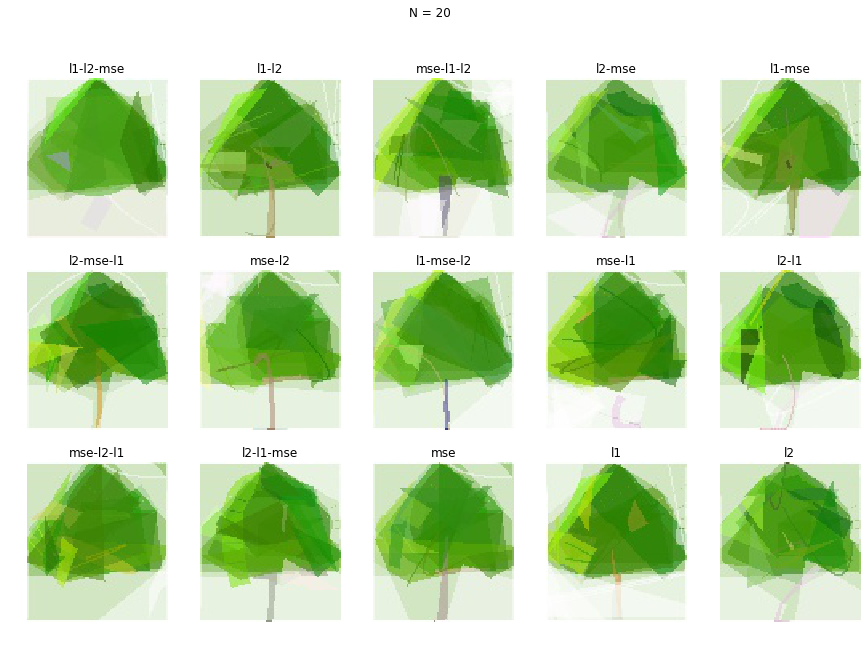

In [33]:
draw(20)
plot(20)

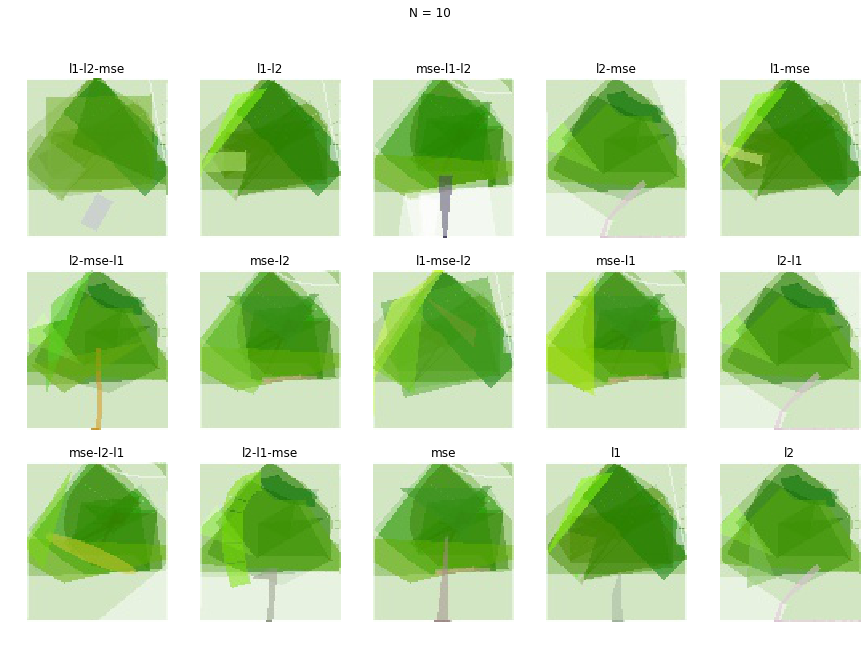

In [34]:
draw(10)
plot(10)

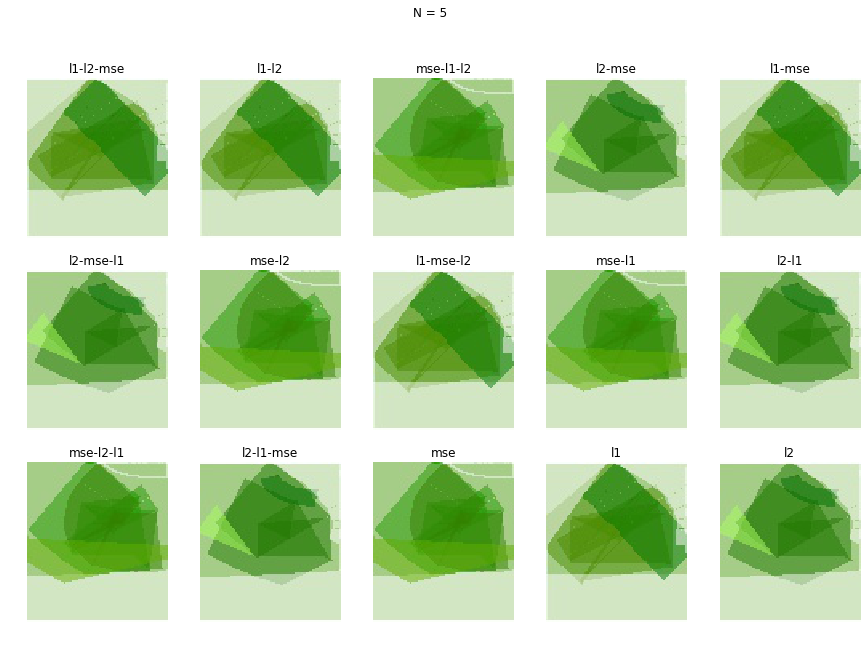

In [35]:
draw(5)
plot(5)

### GAN vs narysowany mnist
Jak dyskryminator uczony na mniście reaguje na rysunki mnista?

model - D wyciągnięcity z wytrenowanego DCGANa na mniście (conditional)  
średnia predykcja dla mnista = 0.520585059228912 (1 - true, 0 - fake)

#### mean of predictions

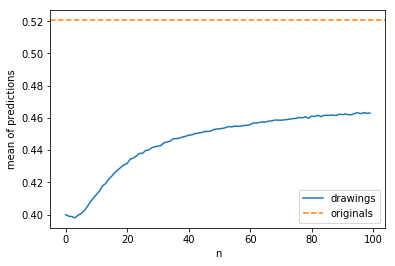

In [6]:
preds = [0.39994547512247225, 0.39900021685315296, 0.3987822303052526, 0.3979408576627262, 0.39957722920235245, 0.4006277074640617, 0.40235171935511754, 0.4048162593732588, 0.40789127889079974, 0.4102115430309437, 0.4125151523379609, 0.4145670762868598, 0.4178382130487822, 0.41922828138708135, 0.4219443164499477, 0.4239036162292585, 0.42611622364632784, 0.4277849896963686, 0.42938376988330856, 0.4309830475330353, 0.43174637048840525, 0.43441022864878176, 0.4350954597060103, 0.4363721721497597, 0.4379546264161356, 0.43799650432560594, 0.4397736671688268, 0.4400818272368051, 0.4414430866710842, 0.44215761894499883, 0.4424011827824637, 0.4429199943460524, 0.4445368559582159, 0.44500465371664616, 0.44560073813572526, 0.4471004699327052, 0.44710265614707023, 0.4474176072205184, 0.4481629318915307, 0.44853097103517503, 0.4493120626442134, 0.4494367049522698, 0.4502853290297091, 0.4504875335382298, 0.45084295119047163, 0.4514651430536993, 0.45161295486167075, 0.45167600110052153, 0.4526742172146216, 0.4530833126040176, 0.4532059103153646, 0.453451853293326, 0.4539675203954801, 0.4546713810403831, 0.4543900041000918, 0.45490657517630606, 0.45476411836398767, 0.45491159128433795, 0.45532847498878837, 0.45539213702376, 0.4558117190251127, 0.456855574739445, 0.4567646788521204, 0.4571310273073614, 0.45747508744448423, 0.4573917478624731, 0.4579804164392874, 0.45812884668130427, 0.45865773074156607, 0.45863185259979217, 0.45857811812320726, 0.45874120097924026, 0.4589809769514948, 0.4592280176773667, 0.45954216053001584, 0.4597414027415216, 0.46030676840767265, 0.46000025475742295, 0.4606687726661563, 0.4597985628192313, 0.4610588541460223, 0.46089008719641716, 0.4616627770971973, 0.46070652882370633, 0.46155868663098665, 0.461621736085671, 0.4616253259608522, 0.46171961143156515, 0.46145798785425723, 0.4622950458692387, 0.462021514855139, 0.4624272296779789, 0.46193486479334533, 0.461997471513506, 0.462775960357557, 0.4631873999143019, 0.46261887232083826, 0.46328139977790417, 0.46285088004390706, 0.4629895063979551]
plt.plot(preds)
plt.xlabel('n')
plt.ylabel('mean of predictions')
plt.axhline(y=0.520585059228912, linestyle='--', c='C1')
plt.legend(['drawings', 'originals'])
plt.show()

#### variance of predictions

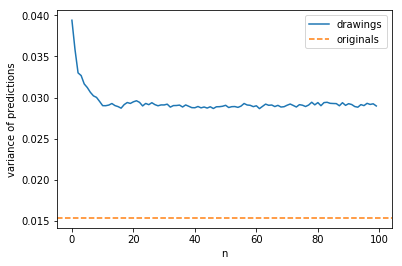

In [7]:
vars = [0.03939211928140629, 0.035838218155976764, 0.03299333971806529, 0.03267010646478978, 0.03165305011386911, 0.03121367091931493, 0.030634672126001947, 0.03020260532563537, 0.030016896124010692, 0.029528493028387236, 0.029012728924600946, 0.02900634962091246, 0.02908437954509959, 0.029272548246424543, 0.029021479320408376, 0.02889888481970967, 0.028706946387996625, 0.029141227399735806, 0.02939295133917566, 0.029282644739845192, 0.029480198130378762, 0.029607529460028197, 0.02941167625290047, 0.028978636081094303, 0.029283094269872738, 0.029132129040268732, 0.029371201071730333, 0.029136802969552077, 0.02899748647773892, 0.029102634037783816, 0.029097907337096926, 0.02919361398506787, 0.02883625702114115, 0.02902081692839593, 0.02903105664445788, 0.02908044860418064, 0.02884843872129083, 0.029099852571472712, 0.02893837004814593, 0.028770985116206377, 0.02875996377118803, 0.02891058335606253, 0.028746856949487348, 0.028848641588332377, 0.028719101340004397, 0.0288776295270669, 0.02866481153672396, 0.028875830056825452, 0.028887447749678302, 0.028938197687372498, 0.029055912877730544, 0.028785480337376577, 0.028889480213844045, 0.028903720793689372, 0.02880512969086257, 0.028957332723417488, 0.02927458370330501, 0.02909311612629425, 0.02905362960368247, 0.028891857261669554, 0.028998304464562603, 0.028652475996854672, 0.028927714582541425, 0.029201078938398416, 0.0290566013794345, 0.029090887405906506, 0.028901194154357598, 0.029048518733842416, 0.028845336179382723, 0.028885209476425477, 0.029063692073784245, 0.02921092765404004, 0.029035744756017147, 0.028848634219288634, 0.029133452756334253, 0.029065895150678762, 0.028907975252040426, 0.029087429474799524, 0.0294257787950777, 0.029111400630875438, 0.029385306831147352, 0.02900630828816822, 0.029383941064107057, 0.029422782239312693, 0.029295913045359924, 0.02927380437788138, 0.029261011344190235, 0.028997925103050427, 0.029372257440091545, 0.02904874438327966, 0.029250453599046124, 0.029151207249399028, 0.028905113371296982, 0.028825074456106024, 0.02913975430329091, 0.02901694867918868, 0.029295344092487484, 0.029161033755068427, 0.029237987485566833, 0.02897310488114983]
plt.plot(vars)
plt.xlabel('n')
plt.ylabel('variance of predictions')
plt.axhline(y=0.015370296003125597, linestyle='--', c='C1')
plt.legend(['drawings', 'originals'])
plt.show()

#### histogram of predictions

In [28]:
preds_mnist = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs.npz')['data']
preds_samples = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-samples.npz')['data']

In [16]:
preds_20 = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-drawings.npz')['twenty']
preds_50 = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-drawings.npz')['fifty']
preds_100 = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-drawings.npz')['hundred']

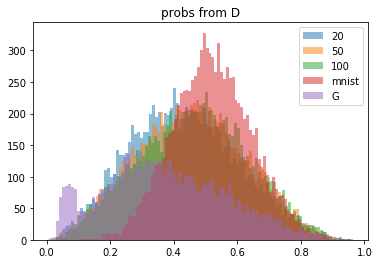

In [32]:
plt.hist(preds_20, bins=100, alpha=0.5)
plt.hist(preds_50, bins=100, alpha=0.5)
plt.hist(preds_100, bins=100, alpha=0.5)
plt.hist(preds_mnist, bins=100, alpha=0.5)
plt.hist(preds_samples, bins=100, alpha=0.5)
plt.legend(['20', '50', '100', 'mnist', 'G'])
plt.title('probs from D')
plt.show()

In [93]:
PAIRS = "/Users/mchrusci/uj/shaper/random-triangles.npz"
with np.load(PAIRS) as data:
    mnist = data['mnist'].reshape(-1, 28, 28)
    triangles = data['triangles'].reshape(-1, 28, 28)
    labels = data['labels']

4


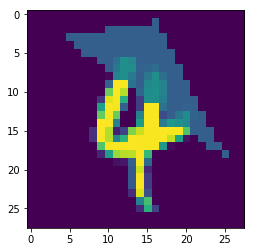

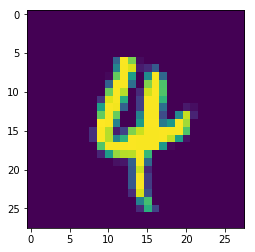

In [100]:
i = np.random.randint(0, 10000)
print(labels[i])
plt.imshow(triangles[i])
plt.show()
plt.imshow(mnist[i])
plt.show()

In [101]:
good = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-pairs.npz')['good']
bad = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-pairs.npz')['bad']

Text(0, 0.5, 'rysunek')

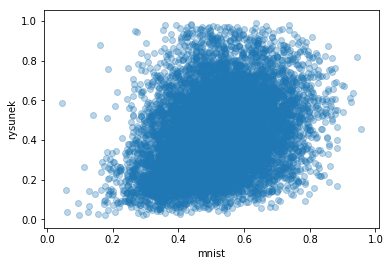

In [102]:
plt.scatter(good, bad, alpha=0.3)
plt.xlabel('mnist')
plt.ylabel('rysunek')

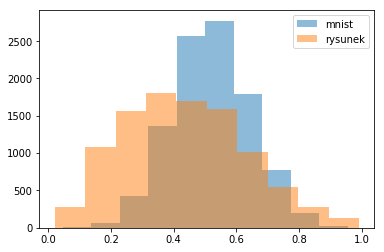

In [104]:
plt.hist(good, alpha=0.5)
plt.hist(bad, alpha=0.5)
plt.legend(['mnist', 'rysunek'])

In [105]:
PAIRS = "/Users/mchrusci/uj/shaper/random-triangles-empty.npz"
with np.load(PAIRS) as data:
    mnist = data['mnist'].reshape(-1, 28, 28)
    triangles = data['triangles'].reshape(-1, 28, 28)
    labels = data['labels']

5


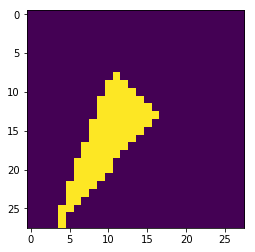

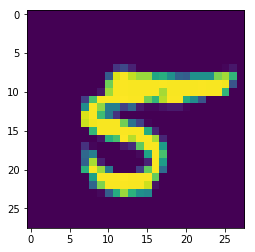

In [106]:
i = np.random.randint(0, 10000)
print(labels[i])
plt.imshow(triangles[i])
plt.show()
plt.imshow(mnist[i])
plt.show()

Text(0, 0.5, 'rysunek')

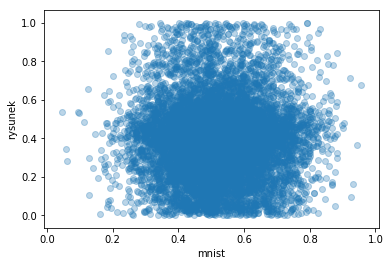

In [107]:
good = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-pairs-empty.npz')['good']
bad = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-pairs-empty.npz')['bad']
plt.scatter(good, bad, alpha=0.3)
plt.xlabel('mnist')
plt.ylabel('rysunek')

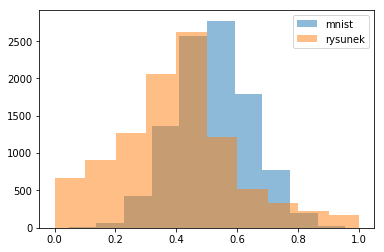

In [108]:
plt.hist(good, alpha=0.5)
plt.hist(bad, alpha=0.5)
plt.legend(['mnist', 'rysunek'])

In [110]:
PAIRS = "/Users/mchrusci/uj/shaper/random-triangles-empty-10.npz"
with np.load(PAIRS) as data:
    mnist = data['mnist'].reshape(-1, 28, 28)
    triangles = data['triangles'].reshape(-1, 28, 28)
    labels = data['labels']

6


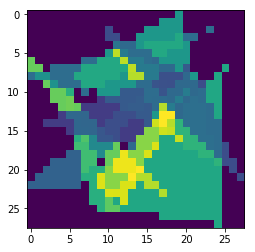

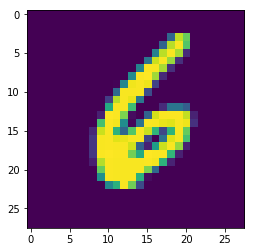

In [111]:
i = np.random.randint(0, 10000)
print(labels[i])
plt.imshow(triangles[i])
plt.show()
plt.imshow(mnist[i])
plt.show()

Text(0, 0.5, 'rysunek')

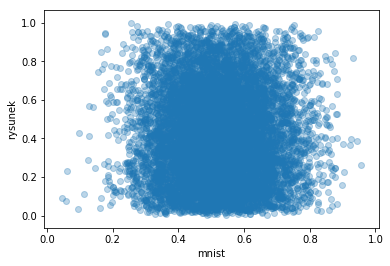

In [112]:
good = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-pairs-empty-10.npz')['good']
bad = np.load('/Users/mchrusci/uj/DCGAN-tensorflow/probs-pairs-empty-10.npz')['bad']
plt.scatter(good, bad, alpha=0.3)
plt.xlabel('mnist')
plt.ylabel('rysunek')

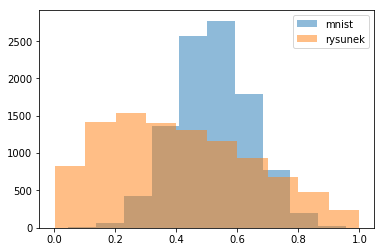

In [113]:
plt.hist(good, alpha=0.5)
plt.hist(bad, alpha=0.5)
plt.legend(['mnist', 'rysunek'])